# Импорты

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [2]:
df = pd.concat([pd.read_csv(i) for i in glob.glob('data2/atp_matches_[12][019][01298]*')], axis=0)

# Задание 1

In [3]:
rank_df = df[['winner_name','loser_name', 'winner_rank', 'loser_rank']].copy()
rank_df

,winner_name,loser_name,winner_rank,loser_rank
0,Bjorn Borg,Guillermo Vilas,1.0,6.0
1,Vitas Gerulaitis,John McEnroe,5.0,2.0
2,Bjorn Borg,Vitas Gerulaitis,1.0,5.0
3,Peter Feigl,Christophe Freyss,58.0,NaN
4,Onny Parun,Mark Turpin,NaN,NaN
...,...,...,...,...
101,Michael Mmoh,Manas Dhamne,113.0,NaN
102,Benjamin Bonzi,Chun Hsin Tseng,60.0,115.0
103,Laslo Djere,Alex Molcan,70.0,50.0
104,Maximilian Marterer,Elias Ymer,159.0,127.0


In [4]:
rank_df.dropna(inplace=True, axis=0)
rank_df

,winner_name,loser_name,winner_rank,loser_rank
0,Bjorn Borg,Guillermo Vilas,1.0,6.0
1,Vitas Gerulaitis,John McEnroe,5.0,2.0
2,Bjorn Borg,Vitas Gerulaitis,1.0,5.0
62,Corrado Barazzutti,Patrice Dominguez,32.0,64.0
65,Tomas Smid,Belus Prajoux,29.0,93.0
...,...,...,...,...
100,Filip Krajinovic,Sumit Nagal,54.0,503.0
102,Benjamin Bonzi,Chun Hsin Tseng,60.0,115.0
103,Laslo Djere,Alex Molcan,70.0,50.0
104,Maximilian Marterer,Elias Ymer,159.0,127.0


In [5]:
rank_20g = rank_df[(rank_df['loser_rank'] - rank_df['winner_rank']) > 20]
rank_20g

,winner_name,loser_name,winner_rank,loser_rank
62,Corrado Barazzutti,Patrice Dominguez,32.0,64.0
65,Tomas Smid,Belus Prajoux,29.0,93.0
89,Tomas Smid,Fernando Luna,29.0,67.0
90,Peter Mcnamara,Patrick Proisy,45.0,78.0
153,Colin Dibley,Shlomo Glickstein,57.0,82.0
...,...,...,...,...
97,Pedro Martinez,Ramkumar Ramanathan,62.0,435.0
99,Aslan Karatsev,Pablo Andujar,59.0,121.0
100,Filip Krajinovic,Sumit Nagal,54.0,503.0
102,Benjamin Bonzi,Chun Hsin Tseng,60.0,115.0


In [6]:
rank_20g[rank_20g['winner_name'] == 'Aaron Krickstein']


,winner_name,loser_name,winner_rank,loser_rank
563,Aaron Krickstein,Derek Tarr,16.0,121.0
577,Aaron Krickstein,Eduardo Bengoechea,16.0,146.0
588,Aaron Krickstein,Alejandro Ganzabal,16.0,85.0
856,Aaron Krickstein,Jeff Turpin,16.0,185.0
864,Aaron Krickstein,Jakob Hlasek,16.0,118.0
...,...,...,...,...
2097,Aaron Krickstein,Christian Bergstrom,45.0,148.0
2166,Aaron Krickstein,Tomas Carbonell,45.0,93.0
2363,Aaron Krickstein,Marcos Ondruska,44.0,120.0
2450,Aaron Krickstein,Jim Grabb,46.0,106.0


In [7]:
rank_20g_groupped = rank_20g.groupby(by='winner_name').count().reset_index().rename({'winner_rank':'win_count'},axis=1)
rank_20g_groupped

,winner_name,loser_name,win_count,loser_rank
0,Aaron Krickstein,256,256,256
1,Abdullah Maqdas,3,3,3
2,Adam Chadaj,1,1,1
3,Adam Kellner,3,3,3
4,Adam Malik,2,2,2
...,...,...,...,...
1703,Zhe Li,5,5,5
1704,Zhizhen Zhang,2,2,2
1705,Zizou Bergs,1,1,1
1706,Zoltan Kuharszky,6,6,6


In [8]:
rank_20l = rank_df[(rank_df['winner_rank'] - rank_df['loser_rank']) > 20]
rank_20l

,winner_name,loser_name,winner_rank,loser_rank
154,Chris Delaney,Rod Frawley,90.0,61.0
208,Thomaz Koch,Gianni Ocleppo,78.0,35.0
214,Vincent Van Patten,Victor Pecci,45.0,10.0
224,Rand Evett,Matt Mitchell,356.0,106.0
226,John Austin,Chris Lewis,156.0,65.0
...,...,...,...,...
81,Benjamin Bonzi,Botic Van De Zandschulp,60.0,35.0
82,Tallon Griekspoor,Marin Cilic,95.0,17.0
92,Maximilian Marterer,Laslo Djere,159.0,70.0
96,Tallon Griekspoor,Jaume Munar,95.0,58.0


In [9]:
rank_20l_groupped = rank_20l.groupby(by='loser_name').count().reset_index().rename({'winner_rank':'loser_count'},axis=1)
rank_20l_groupped

,loser_name,winner_name,loser_count,loser_rank
0,Aaron Krickstein,105,105,105
1,Abdul Khalek Nadini,1,1,1
2,Abdullah Maqdas,1,1,1
3,Adam Kellner,3,3,3
4,Adam Malik,1,1,1
...,...,...,...,...
1603,Zeeshan Ali,2,2,2
1604,Zeljko Krajan,2,2,2
1605,Zhe Li,4,4,4
1606,Zizou Bergs,3,3,3


Доля выигрышей для игроков с рейтингом более, чем на 20 позиций выше соперника

In [10]:
share_20g = pd.merge(rank_20g_groupped[['winner_name', 'win_count']], rank_20l_groupped[['loser_name','loser_count']], left_on='winner_name', right_on='loser_name')
share_20g['share'] = share_20g['win_count']/(share_20g['win_count']+share_20g['loser_count'])
share_20g

,winner_name,win_count,loser_name,loser_count,share
0,Aaron Krickstein,256,Aaron Krickstein,105,0.709141
1,Abdullah Maqdas,3,Abdullah Maqdas,1,0.750000
2,Adam Kellner,3,Adam Kellner,3,0.500000
3,Adam Malik,2,Adam Malik,1,0.666667
4,Adrian Garcia,4,Adrian Garcia,5,0.444444
...,...,...,...,...,...
1359,Zeeshan Ali,1,Zeeshan Ali,2,0.333333
1360,Zeljko Krajan,3,Zeljko Krajan,2,0.600000
1361,Zhe Li,5,Zhe Li,4,0.555556
1362,Zizou Bergs,1,Zizou Bergs,3,0.250000


In [11]:
rank_20g_groupped_l = rank_20g.groupby(by='loser_name').count().reset_index().rename({'winner_rank':'loser_count'},axis=1)
rank_20g_groupped_l


,loser_name,winner_name,loser_count,loser_rank
0,Aaron Krickstein,63,63,63
1,Abdelhak Hameurlaine,4,4,4
2,Abdul Kahar Mim,2,2,2
3,Abdul Khalek Nadini,1,1,1
4,Abdul Mumin Babalola,2,2,2
...,...,...,...,...
3285,Zizou Bergs,8,8,8
3286,Zoltan Boroczky,1,1,1
3287,Zoltan Kuharszky,23,23,23
3288,Zoran Sevcenko,1,1,1


In [12]:
rank_20l_groupped_w = rank_20l.groupby(by='winner_name').count().reset_index().rename({'winner_rank':'win_count'},axis=1)
rank_20l_groupped_w

,winner_name,loser_name,win_count,loser_rank
0,Aaron Krickstein,33,33,33
1,Abdelhak Hameurlaine,1,1,1
2,Abdullah Maqdas,4,4,4
3,Adam Chadaj,1,1,1
4,Adam Malik,2,2,2
...,...,...,...,...
2125,Zhe Li,1,1,1
2126,Zhizhen Zhang,7,7,7
2127,Zizou Bergs,2,2,2
2128,Zoltan Kuharszky,9,9,9


Доля выигрышей игроков с рангом, более чем на 20 позиций ниже соперника

In [13]:
share_20l = pd.merge(rank_20g_groupped_l[['loser_name', 'loser_count']], rank_20l_groupped_w[['winner_name','win_count']], left_on='loser_name', right_on='winner_name')
share_20l['share'] = share_20l['win_count']/(share_20l['win_count']+share_20l['loser_count'])
share_20l

,loser_name,loser_count,winner_name,win_count,share
0,Aaron Krickstein,63,Aaron Krickstein,33,0.343750
1,Abdelhak Hameurlaine,4,Abdelhak Hameurlaine,1,0.200000
2,Abdullah Maqdas,7,Abdullah Maqdas,4,0.363636
3,Adam Chadaj,1,Adam Chadaj,1,0.500000
4,Adam Malik,3,Adam Malik,2,0.400000
...,...,...,...,...,...
2096,Zhe Li,9,Zhe Li,1,0.100000
2097,Zhizhen Zhang,10,Zhizhen Zhang,7,0.411765
2098,Zizou Bergs,8,Zizou Bergs,2,0.200000
2099,Zoltan Kuharszky,23,Zoltan Kuharszky,9,0.281250


# Задание 2 

## Вот так изменялось:

In [14]:
df['Год'] = np.nan
df.dropna(inplace=True,subset= ['score'])
df.tourney_date.apply(lambda x: '%.0f' % round(x,0))
df.loc[:, 'tourney_date'] = pd.to_datetime(df['tourney_date'], format='%Y%m%d')
df['year']= df['tourney_date'].dt.year
df['sets_num'] = df['score'].map(lambda x: len(x.split()))
years = df['year'].unique()
years.sort()
mean_set = df.groupby(df.tourney_date.dt.year).mean().sets_num
#plt.plot(years, mean_set, label='mean')
#plt.legend()

In [15]:
df_do = df.loc[df['year'] < 2002].copy()
df_posle = df.loc[df['year'] >= 2002].copy()
print(df_do['sets_num'].mean())
print(df_posle['sets_num'].mean())

2.615407647682615
2.6581740976645434


In [16]:
df['Год'] = np.nan
df['Год'] = df['Год'].mask(df['year'] < 2002, "До 2002").mask(df['year'] >= 2002, "После 2002")
sns.set(style="darkgrid")
#sns.lineplot(data=df, x='year', y='sets_num', hue='Год')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [17]:
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1)
    dfn = x.size-1 
    dfd = y.size-1 
    p = 1-stats.f.cdf(f, dfn, dfd) 
    return f, p
print(f_test(df_do['sets_num'], df_posle['sets_num']))
print(np.var(df_do['sets_num'], ddof=1), np.var(df_posle['sets_num'], ddof=1))
print(stats.ttest_ind(df_do['sets_num'], df_posle['sets_num']))

(0.9474986442902855, 0.9999999999995453)
0.6118867624212858 0.6457917022980927
Ttest_indResult(statistic=-10.108655219863682, pvalue=5.1527778969647905e-24)


### Нулевую гипотезу отвергаем.

# Задание 3

In [18]:
df_early = df.loc[(df['year'] < 2002)&(df['best_of']==5)].copy()
df_later = df.loc[(df['year'] >= 2002)&(df['best_of']==5)].copy()
print(f_test(df_do['sets_num'], df_posle['sets_num']))
print(np.var(df_do['sets_num'], ddof=1), np.var(df_posle['sets_num'], ddof=1))
print(stats.ttest_ind(df_do['sets_num'], df_posle['sets_num']))

(0.9474986442902855, 0.9999999999995453)
0.6118867624212858 0.6457917022980927
Ttest_indResult(statistic=-10.108655219863682, pvalue=5.1527778969647905e-24)


### Нулевую гипотезу отвергаем.

# Задание 4

In [19]:
df.dropna(inplace=True,subset= ['w_bpSaved', 'w_bpFaced', 'l_bpSaved', 'l_bpFaced'])

In [20]:
df[['winner_name', 'w_bpSaved', 'w_bpFaced', 'loser_name','l_bpSaved', 'l_bpFaced']]

,winner_name,w_bpSaved,w_bpFaced,loser_name,l_bpSaved,l_bpFaced
0,Magnus Larsson,2.0,4.0,Boris Becker,6.0,8.0
1,Slobodan Zivojinovic,9.0,10.0,Mark Kratzmann,1.0,2.0
2,Patrik Kuhnen,1.0,1.0,Veli Paloheimo,4.0,8.0
3,Todd Woodbridge,3.0,3.0,Guillaume Raoux,5.0,8.0
4,Udo Riglewski,7.0,8.0,Sergi Bruguera,4.0,8.0
...,...,...,...,...,...,...
101,Michael Mmoh,2.0,3.0,Manas Dhamne,6.0,10.0
102,Benjamin Bonzi,0.0,0.0,Chun Hsin Tseng,1.0,5.0
103,Laslo Djere,0.0,0.0,Alex Molcan,2.0,5.0
104,Maximilian Marterer,0.0,2.0,Elias Ymer,2.0,6.0


3 Игрока

In [21]:
safin_win = df[(df['winner_name'] =='Marat Safin') & ~((df['w_bpSaved'] == 0) & (df['w_bpFaced'] == 0))].copy()
safin_lose = df[(df['loser_name'] =='Marat Safin') & ~((df['l_bpSaved'] == 0) & (df['l_bpFaced'] == 0))].copy()


In [22]:
federer_win = df[(df['winner_name'] =='Roger Federer') & ~((df['w_bpSaved'] == 0) & (df['w_bpFaced'] == 0))].copy()
federer_lose = df[(df['loser_name'] =='Roger Federer') & ~((df['l_bpSaved'] == 0) & (df['l_bpFaced'] == 0))].copy()

In [23]:
sampras_win = df[(df['winner_name'] =='Pete Sampras') & ~((df['w_bpSaved'] == 0) & (df['w_bpFaced'] == 0))].copy()
sampras_lose= df[(df['loser_name'] =='Pete Sampras') & ~((df['l_bpSaved'] == 0) & (df['l_bpFaced'] == 0))].copy()

Игрок 1

In [24]:
safin_win[['w_bpSaved', 'w_bpFaced', 'year']].groupby(by='year').sum().reset_index()

,year,w_bpSaved,w_bpFaced
0,1998,67.0,98.0
1,1999,120.0,191.0
2,2000,228.0,336.0
3,2001,168.0,244.0
4,2002,185.0,268.0
5,2003,48.0,69.0
6,2004,150.0,217.0
7,2005,96.0,141.0
8,2006,96.0,138.0
9,2007,103.0,152.0


<AxesSubplot:>

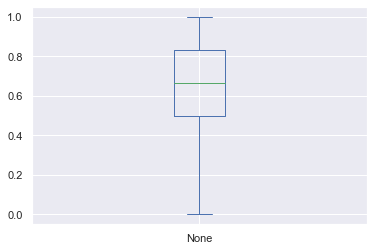

In [25]:
(safin_win['w_bpSaved']/safin_win['w_bpFaced']).plot.box()

In [26]:
safin_lose[['l_bpSaved', 'l_bpFaced']]

,l_bpSaved,l_bpFaced
3525,4.0,6.0
564,3.0,5.0
1081,8.0,12.0
1683,2.0,6.0
1912,7.0,11.0
...,...,...
2083,4.0,8.0
2236,8.0,11.0
2342,1.0,4.0
2487,1.0,4.0


<AxesSubplot:>

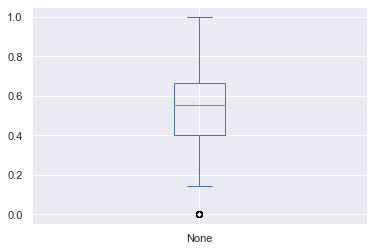

In [27]:
(safin_lose['l_bpSaved']/safin_lose['l_bpFaced']).plot.box()

Доля выигранных брейк-пойнтов по годам в выигранных матчах (Сафин)

In [28]:
safin_win = safin_win[['w_bpSaved', 'w_bpFaced', 'year']].groupby(by='year').sum().reset_index()

safin_bPwin = pd.concat([(safin_win['w_bpSaved']/safin_win['w_bpFaced']).reset_index(drop=True), 
                         pd.Series(np.ones_like(safin_win['w_bpSaved']), name='win')], axis=1)
safin_bPwin

,0,win
0,0.683673,1.0
1,0.628272,1.0
2,0.678571,1.0
3,0.688525,1.0
4,0.690299,1.0
5,0.695652,1.0
6,0.691244,1.0
7,0.680851,1.0
8,0.695652,1.0
9,0.677632,1.0


In [29]:
safin_bPwin = safin_bPwin.rename(columns={0: 'BP_won'})

Доля выигранных брейк-поинтов по годам в проигранных матчах (Сафин). Убрали 1 год, чтобы была одинаковая размерность

In [30]:
safin_lose = safin_lose[['l_bpSaved', 'l_bpFaced', 'year']].groupby(by='year').sum().reset_index().iloc[1:]
safin_bPlose = pd.concat([(safin_lose['l_bpSaved']/safin_lose['l_bpFaced']).reset_index(drop=True), 
                       pd.Series(np.zeros_like(safin_lose['l_bpSaved']), name='win')], axis=1)
safin_bPlose

,0,win
0,0.545455,0.0
1,0.488688,0.0
2,0.553073,0.0
3,0.512658,0.0
4,0.589595,0.0
5,0.589474,0.0
6,0.582278,0.0
7,0.545455,0.0
8,0.616740,0.0
9,0.597122,0.0


In [31]:
safin_bPlose = safin_bPlose.rename(columns={0: 'BP_won'})

In [32]:
BP_data_safin = pd.concat([safin_bPwin, safin_bPlose])

In [33]:
BP_data_safin = BP_data_safin.reset_index(drop=True)
BP_data_safin

,BP_won,win
0,0.683673,1.0
1,0.628272,1.0
2,0.678571,1.0
3,0.688525,1.0
4,0.690299,1.0
5,0.695652,1.0
6,0.691244,1.0
7,0.680851,1.0
8,0.695652,1.0
9,0.677632,1.0


<AxesSubplot:xlabel='win', ylabel='BP_won'>

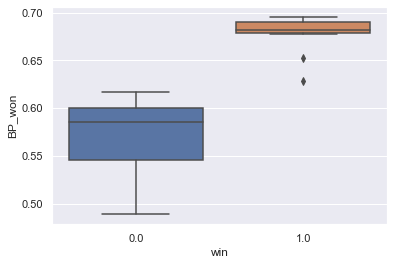

In [34]:
sns.boxplot(data=BP_data_safin, x='win', y='BP_won')

In [35]:
crosstab_safin = pd.concat([safin_bPwin['BP_won'].rename('win'), 
           safin_bPlose['BP_won'].rename('lose')], 
          axis=1)
crosstab_safin

,win,lose
0,0.683673,0.545455
1,0.628272,0.488688
2,0.678571,0.553073
3,0.688525,0.512658
4,0.690299,0.589595
5,0.695652,0.589474
6,0.691244,0.582278
7,0.680851,0.545455
8,0.695652,0.616740
9,0.677632,0.597122


In [36]:
stats.chi2_contingency(crosstab_safin)

(0.014163074363582885,
 0.9999999999999948,
 11,
 array([[0.66813018, 0.56099783],
        [0.60715784, 0.50980219],
        [0.66949785, 0.5621462 ],
        [0.65293971, 0.5482431 ],
        [0.69572552, 0.58416836],
        [0.69856952, 0.58655633],
        [0.69226228, 0.58126044],
        [0.66659598, 0.55970963],
        [0.71339101, 0.59900125],
        [0.69293152, 0.58182236],
        [0.70056317, 0.58823031],
        [0.68571252, 0.57576091]]))

In [37]:
chisq_stats_safin = stats.chi2_contingency(crosstab_safin, correction=False)[0]

In [38]:
n = np.sum(crosstab_safin)
n

win     8.143477
lose    6.837699
dtype: float64

In [39]:
n = n.sum()

In [40]:
minshape_safin = min(crosstab_safin.shape)-1

In [41]:
cramer_safin = np.sqrt((chisq_stats_safin/n)/minshape_safin)
cramer_safin

0.030747217077297894

меньше 0.05 -> cвязь между победными матчами и проигранными слабая (очень слабая)

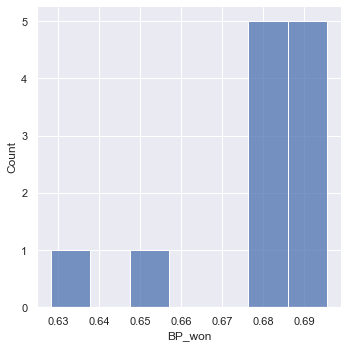

In [42]:
sns.displot(safin_bPwin['BP_won'])

Игрок 2

In [43]:
federer_win[['w_bpSaved', 'w_bpFaced', 'year']].groupby(by='year').sum().reset_index()

,year,w_bpSaved,w_bpFaced
0,1998,5.0,5.0
1,1999,21.0,37.0
2,2000,113.0,152.0
3,2001,215.0,289.0
4,2002,144.0,194.0
5,2003,169.0,239.0
6,2004,182.0,245.0
7,2005,190.0,278.0
8,2006,248.0,345.0
9,2007,170.0,249.0


<AxesSubplot:>

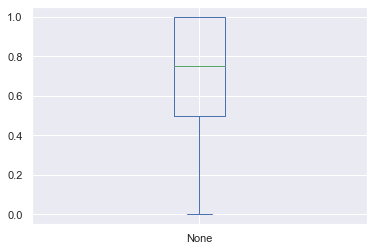

In [44]:
(federer_win['w_bpSaved']/federer_win['w_bpFaced']).plot.box()

In [45]:
federer_lose[['l_bpSaved', 'l_bpFaced']]

,l_bpSaved,l_bpFaced
2030,1.0,5.0
3100,7.0,10.0
3108,4.0,8.0
275,5.0,10.0
493,10.0,16.0
...,...,...
292,7.0,11.0
276,2.0,5.0
1079,7.0,10.0
1207,12.0,15.0


<AxesSubplot:>

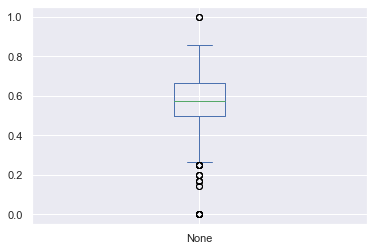

In [46]:
(federer_lose['l_bpSaved']/federer_lose['l_bpFaced']).plot.box()

Доля выигранных брейк-пойнтов по годам в выигранных матчах (Федерер)

In [47]:
federer_win = federer_win[['w_bpSaved', 'w_bpFaced', 'year']].groupby(by='year').sum().reset_index()
federer_bPwin = pd.concat([(federer_win['w_bpSaved']/federer_win['w_bpFaced']).reset_index(drop=True), 
                         pd.Series(np.ones_like(federer_win['w_bpSaved']), name='win')], axis=1)
federer_bPwin

,0,win
0,1.000000,1.0
1,0.567568,1.0
2,0.743421,1.0
3,0.743945,1.0
4,0.742268,1.0
5,0.707113,1.0
6,0.742857,1.0
7,0.683453,1.0
8,0.718841,1.0
9,0.682731,1.0


In [48]:
federer_bPwin = federer_bPwin.rename(columns={0: 'BP_won'})

Доля выигранных брейк-поинтов по годам в проигранных матчах (Федерер).

In [49]:
federer_lose = federer_lose[['l_bpSaved', 'l_bpFaced', 'year']].groupby(by='year').sum().reset_index()
federer_bPlose = pd.concat([(federer_lose['l_bpSaved']/federer_lose['l_bpFaced']).reset_index(drop=True), 
                       pd.Series(np.zeros_like(federer_lose['l_bpSaved']), name='win')], axis=1)
federer_bPlose

,0,win
0,0.521739,0.0
1,0.594406,0.0
2,0.589286,0.0
3,0.544910,0.0
4,0.591837,0.0
5,0.570370,0.0
6,0.625000,0.0
7,0.387755,0.0
8,0.555556,0.0
9,0.559322,0.0


In [50]:
federer_bPlose = federer_bPlose.rename(columns={0: 'BP_won'})

In [51]:
BP_data_federer = pd.concat([federer_bPwin, federer_bPlose])

In [52]:
BP_data_federer = BP_data_federer.reset_index(drop=True)
BP_data_federer

,BP_won,win
0,1.000000,1.0
1,0.567568,1.0
2,0.743421,1.0
3,0.743945,1.0
4,0.742268,1.0
5,0.707113,1.0
6,0.742857,1.0
7,0.683453,1.0
8,0.718841,1.0
9,0.682731,1.0


<AxesSubplot:xlabel='win', ylabel='BP_won'>

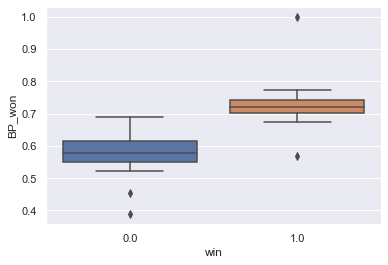

In [53]:
sns.boxplot(data=BP_data_federer, x='win', y='BP_won')

In [54]:
crosstab_federer = pd.concat([federer_bPwin['BP_won'].rename('win'), 
           federer_bPlose['BP_won'].rename('lose')], 
          axis=1)
crosstab_federer

,win,lose
0,1.000000,0.521739
1,0.567568,0.594406
2,0.743421,0.589286
3,0.743945,0.544910
4,0.742268,0.591837
5,0.707113,0.570370
6,0.742857,0.625000
7,0.683453,0.387755
8,0.718841,0.555556
9,0.682731,0.559322


In [55]:
stats.chi2_contingency(crosstab_federer)

(0.18227148927920653,
 1.0,
 23,
 array([[0.84944692, 0.67229221],
        [0.64862269, 0.51335048],
        [0.74392755, 0.58877922],
        [0.71944904, 0.56940578],
        [0.74470793, 0.58939685],
        [0.71310139, 0.56438195],
        [0.76354877, 0.60430838],
        [0.59795704, 0.4732513 ],
        [0.71137809, 0.56301805],
        [0.69332387, 0.54872909],
        [0.74611712, 0.59051215],
        [0.72713257, 0.57548689],
        [0.72564184, 0.57430706],
        [0.71187958, 0.56341495],
        [0.70852905, 0.56076319],
        [0.73468477, 0.58146406],
        [0.76747887, 0.60741884],
        [0.74862907, 0.59250023],
        [0.70228677, 0.55582275],
        [0.64665942, 0.51179665],
        [0.74756872, 0.59166102],
        [0.75653068, 0.59875393],
        [0.73799444, 0.58408348],
        [0.76133366, 0.60255523]]))

In [56]:
chisq_stats_federer = stats.chi2_contingency(crosstab_federer, correction=False)[0]

In [57]:
n = np.sum(crosstab_federer)
n

win     17.407930
lose    13.777454
dtype: float64

In [58]:
n = n.sum()

In [59]:
minshape_federer = min(crosstab_federer.shape)-1

In [60]:
cramer_federer = np.sqrt((chisq_stats_federer/n)/minshape_federer)
cramer_federer

0.07645111540921305

0.07 > 0.05 - связь слабая

Игрок 3

In [61]:
sampras_win[['w_bpSaved', 'w_bpFaced', 'year']].groupby(by='year').sum().reset_index()

,year,w_bpSaved,w_bpFaced
0,1991,126.0,169.0
1,1992,204.0,305.0
2,1993,198.0,282.0
3,1994,187.0,267.0
4,1995,206.0,273.0
5,1996,173.0,233.0
6,1997,99.0,138.0
7,1998,115.0,173.0
8,1999,100.0,136.0
9,2000,120.0,149.0


<AxesSubplot:>

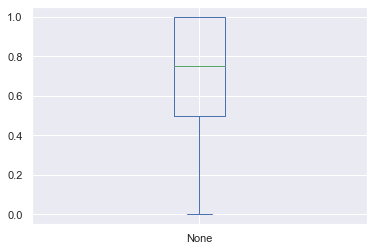

In [62]:
(sampras_win['w_bpSaved']/sampras_win['w_bpFaced']).plot.box()

In [63]:
sampras_lose[['l_bpSaved', 'l_bpFaced']]

,l_bpSaved,l_bpFaced
504,5.0,9.0
544,2.0,4.0
778,4.0,7.0
965,4.0,7.0
1467,3.0,8.0
...,...,...
2298,7.0,12.0
2641,10.0,14.0
2672,0.0,2.0
2674,6.0,10.0


<AxesSubplot:>

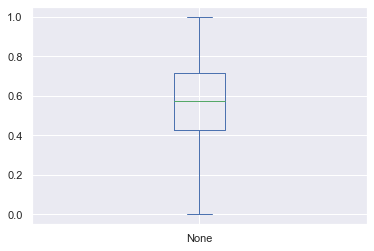

In [64]:
(sampras_lose['l_bpSaved']/sampras_lose['l_bpFaced']).plot.box()

Доля выигранных брейк-пойнтов по годам в выигранных матчах (Сампрас)

In [65]:
sampras_win = sampras_win[['w_bpSaved', 'w_bpFaced', 'year']].groupby(by='year').sum().reset_index()
sampras_bPwin = pd.concat([(sampras_win['w_bpSaved']/sampras_win['w_bpFaced']).reset_index(drop=True), 
                         pd.Series(np.ones_like(sampras_win['w_bpSaved']), name='win')], axis=1)
sampras_bPwin

,0,win
0,0.745562,1.0
1,0.668852,1.0
2,0.702128,1.0
3,0.700375,1.0
4,0.754579,1.0
5,0.742489,1.0
6,0.717391,1.0
7,0.664740,1.0
8,0.735294,1.0
9,0.805369,1.0


In [66]:
sampras_bPwin = sampras_bPwin.rename(columns={0: 'BP_won'})

Доля выигранных брейк-поинтов по годам в проигранных матчах (Сампрас).

In [67]:
sampras_lose = sampras_lose[['l_bpSaved', 'l_bpFaced', 'year']].groupby(by='year').sum().reset_index()
sampras_bPlose = pd.concat([(sampras_lose['l_bpSaved']/sampras_lose['l_bpFaced']).reset_index(drop=True), 
                       pd.Series(np.zeros_like(sampras_lose['l_bpSaved']), name='win')], axis=1)
sampras_bPlose

,0,win
0,0.577465,0.0
1,0.526316,0.0
2,0.645833,0.0
3,0.571429,0.0
4,0.625000,0.0
5,0.627907,0.0
6,0.583333,0.0
7,0.598425,0.0
8,0.593220,0.0
9,0.609756,0.0


In [68]:
sampras_bPlose = sampras_bPlose.rename(columns={0: 'BP_won'})

In [69]:
BP_data_sampras = pd.concat([sampras_bPwin, sampras_bPlose])

In [70]:
BP_data_sampras = BP_data_sampras.reset_index(drop=True)
BP_data_sampras

,BP_won,win
0,0.745562,1.0
1,0.668852,1.0
2,0.702128,1.0
3,0.700375,1.0
4,0.754579,1.0
5,0.742489,1.0
6,0.717391,1.0
7,0.664740,1.0
8,0.735294,1.0
9,0.805369,1.0


<AxesSubplot:xlabel='win', ylabel='BP_won'>

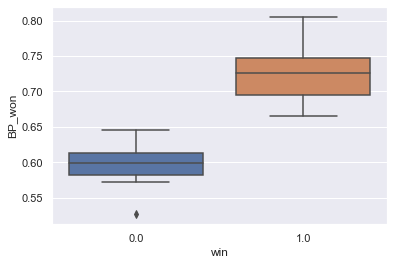

In [71]:
sns.boxplot(data=BP_data_sampras, x='win', y='BP_won')

In [72]:
crosstab_sampras = pd.concat([sampras_bPwin['BP_won'].rename('win'), 
           sampras_bPlose['BP_won'].rename('lose')], 
          axis=1)
crosstab_sampras

,win,lose
0,0.745562,0.577465
1,0.668852,0.526316
2,0.702128,0.645833
3,0.700375,0.571429
4,0.754579,0.625000
5,0.742489,0.627907
6,0.717391,0.583333
7,0.664740,0.598425
8,0.735294,0.593220
9,0.805369,0.609756


In [73]:
stats.chi2_contingency(crosstab_sampras)

(0.01455430371820789,
 0.999999999999994,
 11,
 array([[0.72473986, 0.59828706],
        [0.65470026, 0.54046799],
        [0.73839847, 0.60956252],
        [0.69668   , 0.5751231 ],
        [0.75571834, 0.62386041],
        [0.75068826, 0.61970798],
        [0.71252291, 0.58820173],
        [0.69194819, 0.57121689],
        [0.72774587, 0.60076859],
        [0.77519031, 0.63993491],
        [0.70675828, 0.58344291],
        [0.7462918 , 0.61607862]]))

In [74]:
chisq_stats_sampras = stats.chi2_contingency(crosstab_sampras, correction=False)[0]

In [75]:
n = np.sum(crosstab_sampras)
n

win     8.681383
lose    7.166653
dtype: float64

In [76]:
n = n.sum()

In [77]:
minshape_sampras = min(crosstab_sampras.shape)-1

In [78]:
cramer_sampras = np.sqrt((chisq_stats_sampras/n)/minshape_sampras)
cramer_sampras

0.030304561350308432

0.03 < - 0.05 - связи нет или она очень слабая

тест Манна Уитни для проверки значимости разницы в средних для проигранных и выигранных матчей
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

H0 - распределение в основе выборок совпадают

In [79]:
stats.mannwhitneyu(safin_bPwin['BP_won'], federer_bPwin['BP_won'])

MannwhitneyuResult(statistic=39.0, pvalue=0.00045316177661733847)

In [80]:
stats.mannwhitneyu(safin_bPwin['BP_won'], sampras_bPwin['BP_won'])

MannwhitneyuResult(statistic=28.0, pvalue=0.012004234591850719)

In [81]:
stats.mannwhitneyu(sampras_bPwin['BP_won'], federer_bPwin['BP_won'])

MannwhitneyuResult(statistic=146.0, pvalue=0.9598540751551798)

In [82]:
stats.mannwhitneyu(safin_bPlose['BP_won'], federer_bPlose['BP_won'])

MannwhitneyuResult(statistic=131.5, pvalue=0.6871354801214694)

In [83]:
stats.mannwhitneyu(safin_bPlose['BP_won'], sampras_bPlose['BP_won'])

MannwhitneyuResult(statistic=42.0, pvalue=0.08846450278970225)

In [84]:
stats.mannwhitneyu(sampras_bPlose['BP_won'], federer_bPlose['BP_won'])

MannwhitneyuResult(statistic=184.5, pvalue=0.17946682192028218)

в выигранных матчах p > 0.05 только в матчах у Федерера и Сампраса, т.е. средние совпадают

в проигранных матчах p > 0.05 у всех игроков, т.е средние совпадают

Задача 5

In [85]:
df[['w_bpSaved', 'w_bpFaced','l_bpSaved', 'l_bpFaced']]

,w_bpSaved,w_bpFaced,l_bpSaved,l_bpFaced
0,2.0,4.0,6.0,8.0
1,9.0,10.0,1.0,2.0
2,1.0,1.0,4.0,8.0
3,3.0,3.0,5.0,8.0
4,7.0,8.0,4.0,8.0
...,...,...,...,...
101,2.0,3.0,6.0,10.0
102,0.0,0.0,1.0,5.0
103,0.0,0.0,2.0,5.0
104,0.0,2.0,2.0,6.0


In [86]:
wins = pd.DataFrame({"BP_won": df['w_bpSaved'] / df['w_bpFaced'],
                     'win': 1})
wins

,BP_won,win
0,0.500000,1
1,0.900000,1
2,1.000000,1
3,1.000000,1
4,0.875000,1
...,...,...
101,0.666667,1
102,NaN,1
103,NaN,1
104,0.000000,1


In [87]:
losses = pd.DataFrame({"BP_won": df['l_bpSaved'] / df['l_bpFaced'],
                     'win': 0})
losses

,BP_won,win
0,0.750000,0
1,0.500000,0
2,0.500000,0
3,0.625000,0
4,0.500000,0
...,...,...
101,0.600000,0
102,0.200000,0
103,0.400000,0
104,0.333333,0


In [88]:
df_data = pd.concat([wins,losses]).reset_index(drop=True)

In [89]:
df_data

,BP_won,win
0,0.500000,1
1,0.900000,1
2,1.000000,1
3,1.000000,1
4,0.875000,1
...,...,...
184643,0.600000,0
184644,0.200000,0
184645,0.400000,0
184646,0.333333,0


In [90]:
df_data['median_g'] = df_data['BP_won'] > df_data['BP_won'].median()

In [91]:
df_data['win'].astype(bool)

0          True
1          True
2          True
3          True
4          True
          ...  
184643    False
184644    False
184645    False
184646    False
184647    False
Name: win, Length: 184648, dtype: bool

In [92]:
pd.crosstab(df_data['win'].astype(bool), df_data['median_g'])

median_g,False,True
win,,
False,62981,29343
True,40145,52179


In [93]:
stats.chi2_contingency(pd.crosstab(df_data['win'].astype(bool), df_data['median_g']))

(11452.58809737628,
 0.0,
 1,
 array([[51563., 40761.],
        [51563., 40761.]]))

In [94]:
chisq_stats = stats.chi2_contingency(pd.crosstab(df_data['win'].astype(bool), df_data['median_g']), correction=False)[0]

In [95]:
n = np.sum(pd.crosstab(df_data['win'].astype(bool), df_data['median_g']))

In [96]:
n = n.sum()

In [97]:
minshape = min(pd.crosstab(df_data['win'].astype(bool), df_data['median_g']).shape)-1

In [98]:
cramer = np.sqrt((chisq_stats/n)/minshape)

In [99]:
cramer

0.24905687525487652

~ 0,25 - > связь очень сильная 